# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = '../../data/'

In [41]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)

Path of read in data: ../../data/application_train.csv


In [42]:
app_train['YEARS_BEGINEXPLUATATION_AVG']

0         0.9722
1         0.9851
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12        0.9811
13        0.9806
14        0.9985
15           NaN
16           NaN
17           NaN
18        0.9881
19           NaN
20        0.9781
21           NaN
22        0.9786
23        0.9876
24        0.9861
25        0.9781
26        0.9732
27           NaN
28           NaN
29        0.9831
           ...  
307481       NaN
307482    0.9737
307483    0.9747
307484       NaN
307485       NaN
307486    0.9781
307487       NaN
307488    0.9801
307489    0.9677
307490       NaN
307491       NaN
307492       NaN
307493       NaN
307494       NaN
307495    0.9871
307496       NaN
307497       NaN
307498    0.9891
307499       NaN
307500    0.9876
307501    0.9846
307502       NaN
307503       NaN
307504       NaN
307505    0.9861
307506    0.9876
307507    0.9727
307508    0.98

## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [14]:
# 先篩選數值型的欄位
# dtype_select = []
# for col in app_train.columns:
#     if (app_train[col].dtype == np.float64 or app_train[col].dtype == np.int64):
#         dtype_select.append(col)
        
# print(len(dtype_select))
# print(dtype_select)

106
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', '

In [21]:
# 篩選數值型的欄位-法2
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(['int64', 'float64']))])

Numbers of remain columns: 73


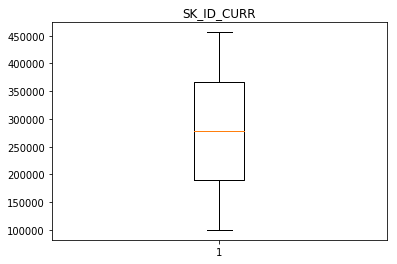

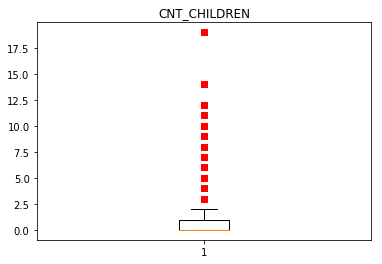

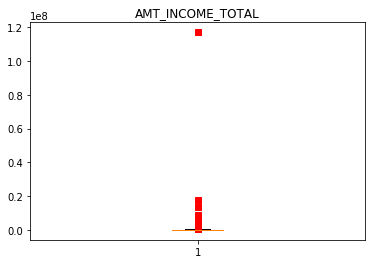

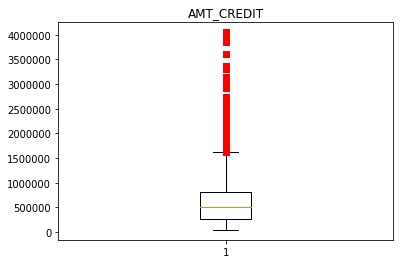

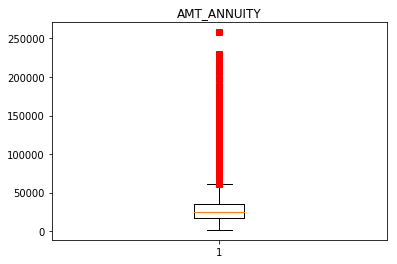

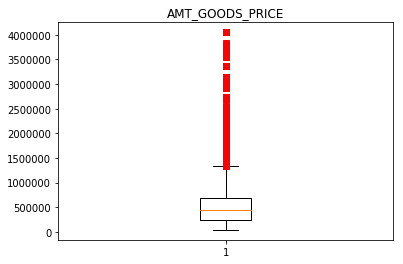

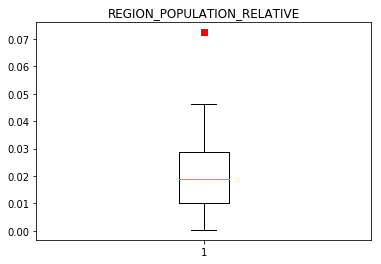

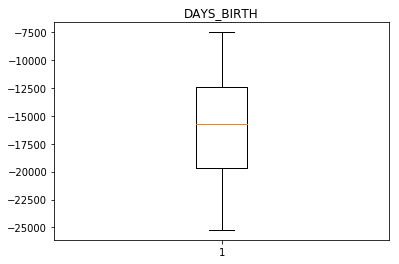

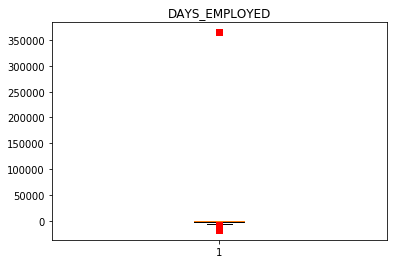

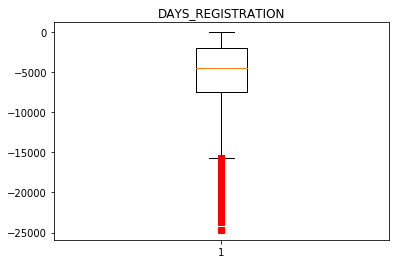

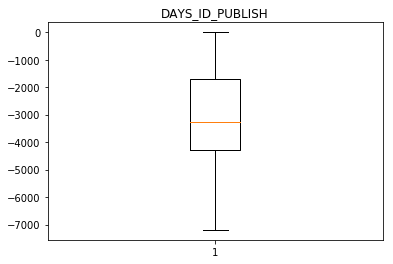

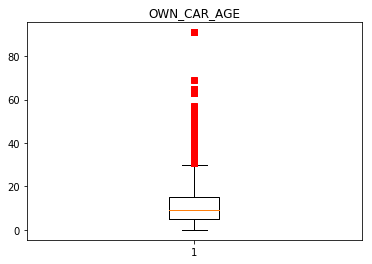

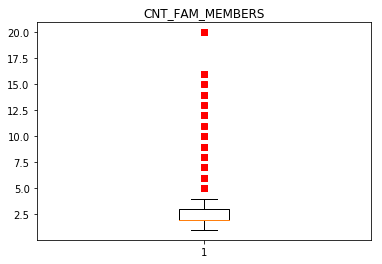

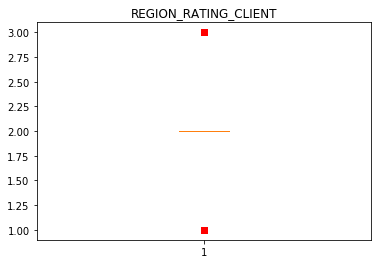

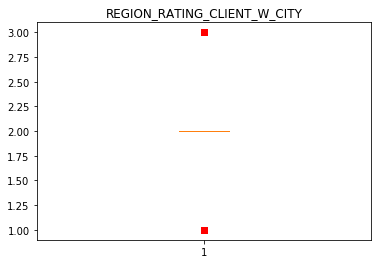

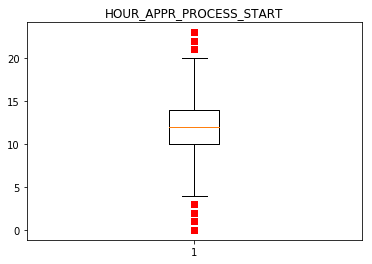

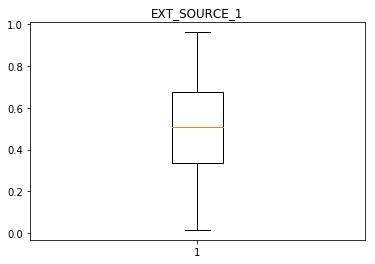

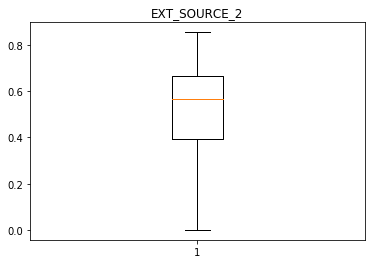

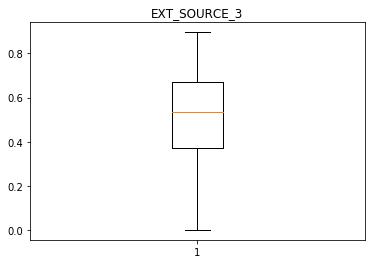

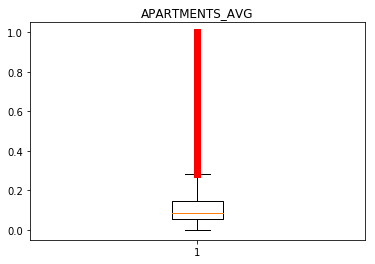

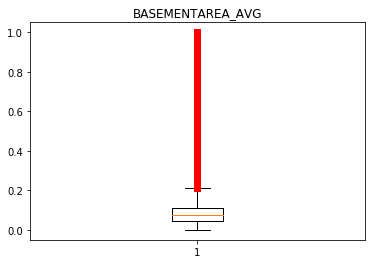

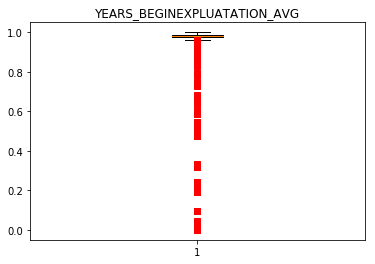

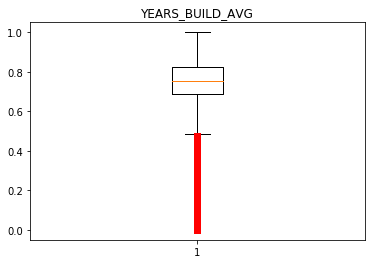

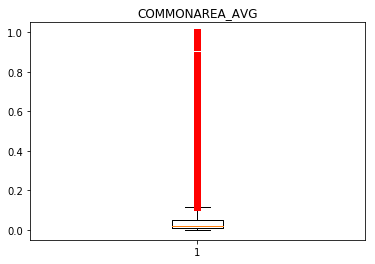

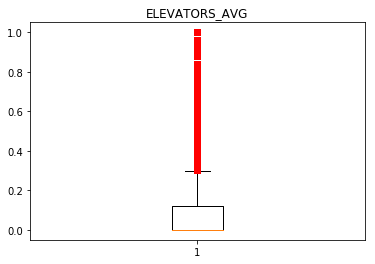

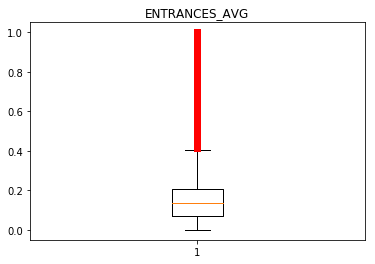

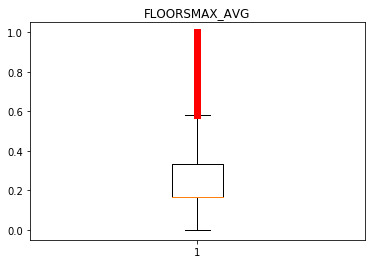

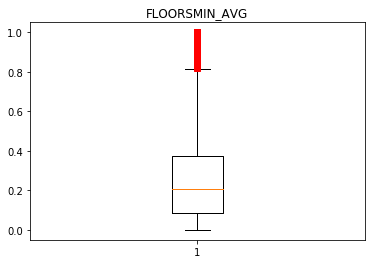

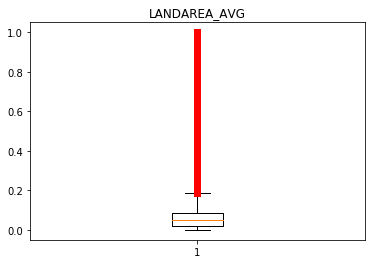

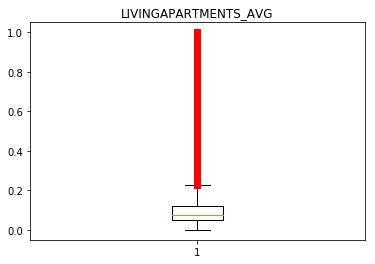

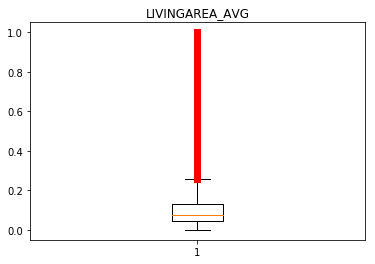

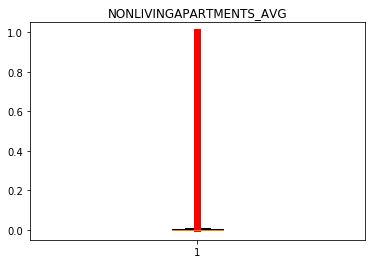

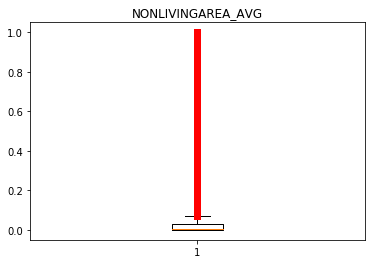

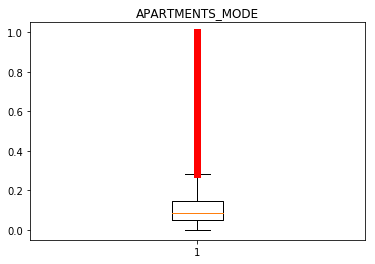

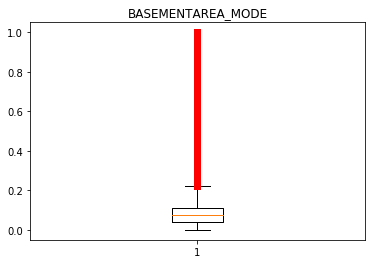

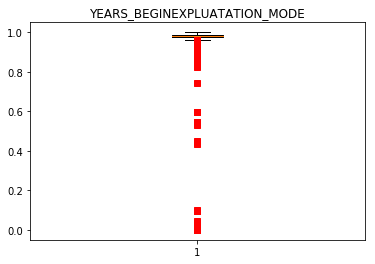

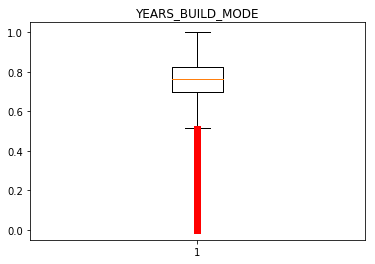

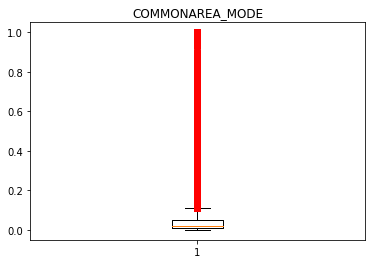

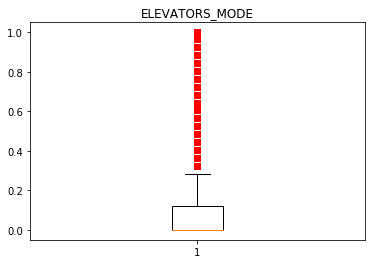

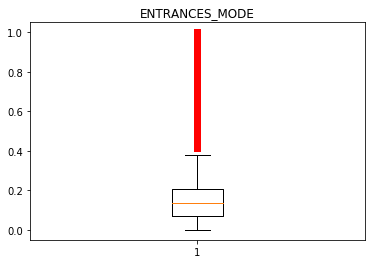

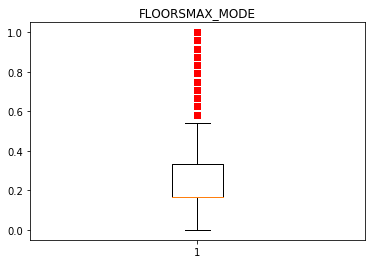

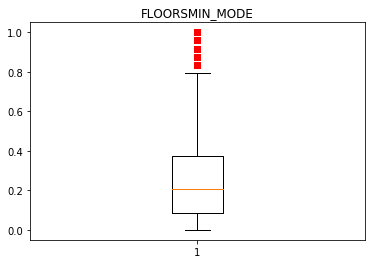

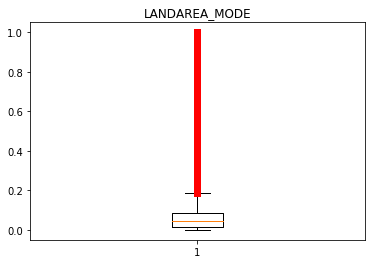

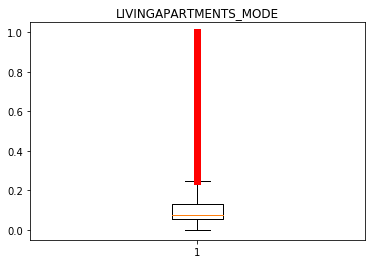

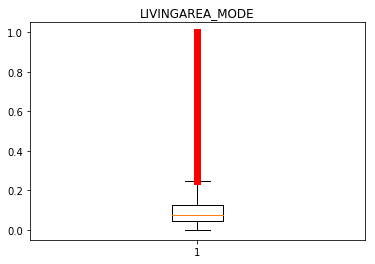

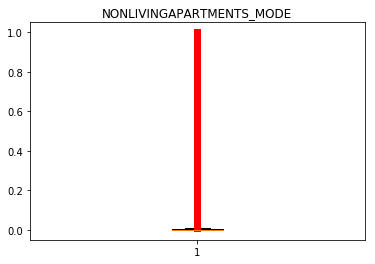

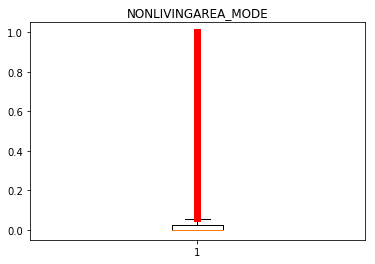

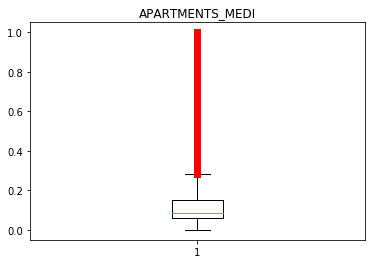

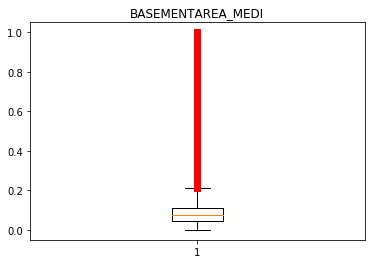

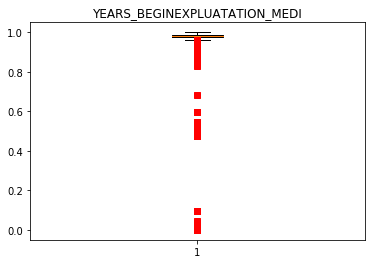

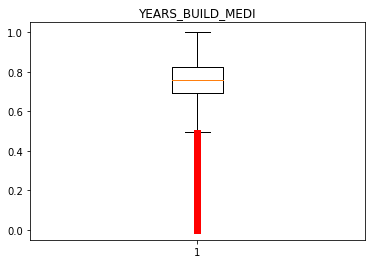

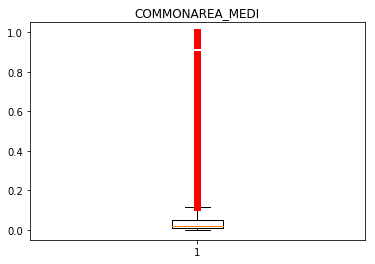

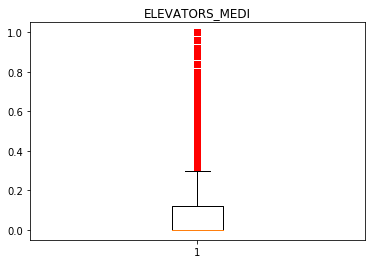

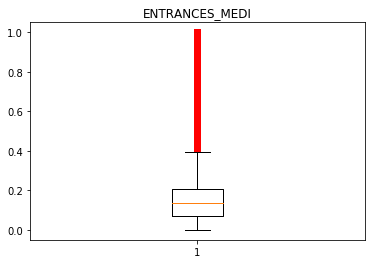

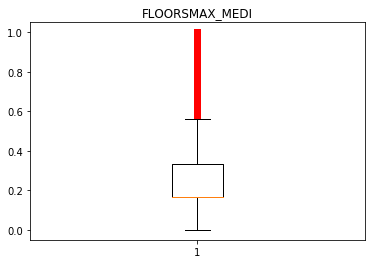

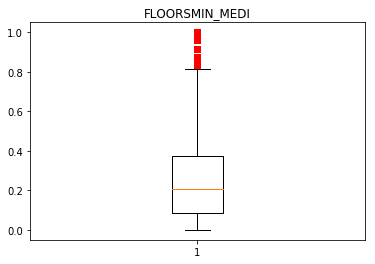

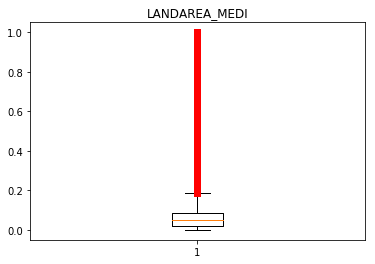

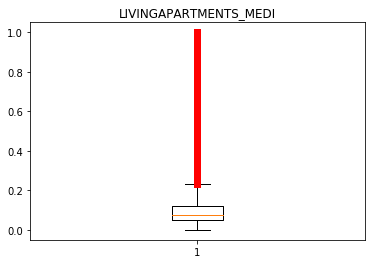

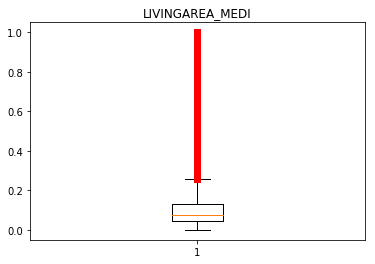

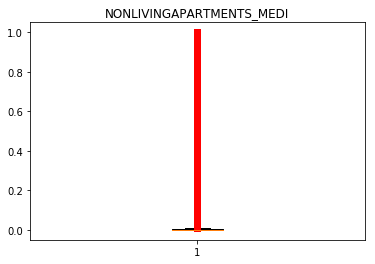

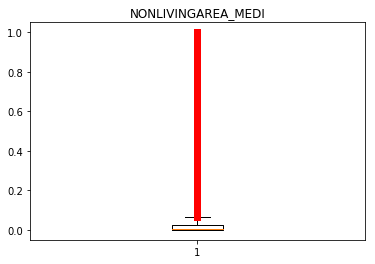

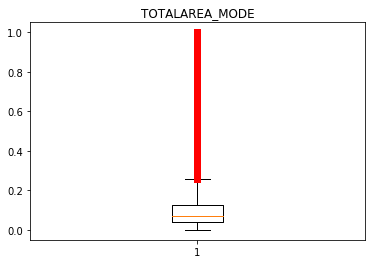

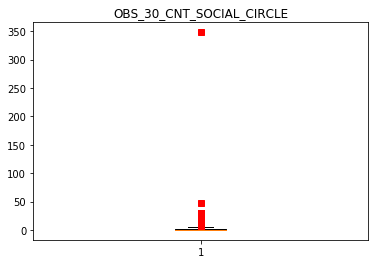

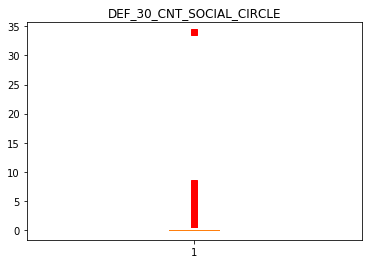

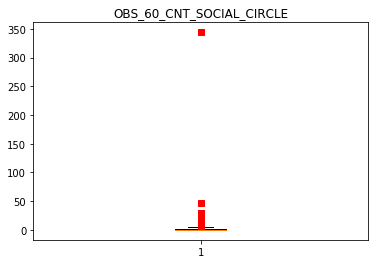

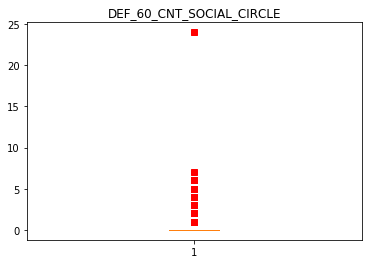

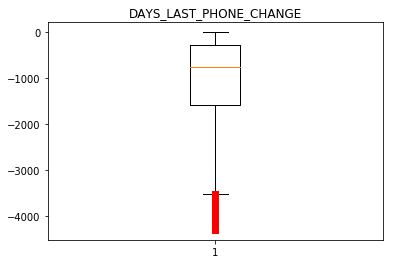

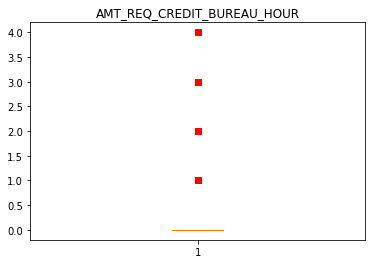

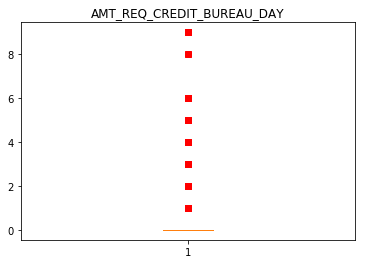

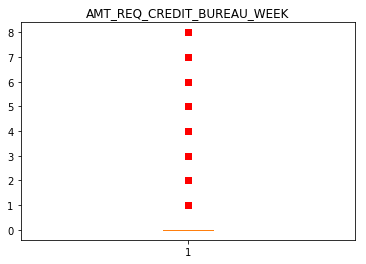

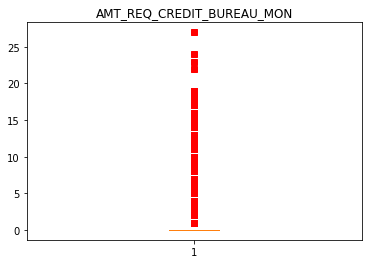

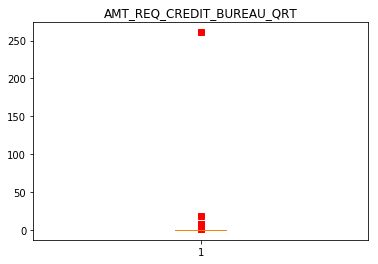

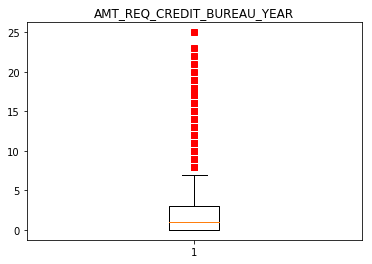

In [44]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
# unique()可檢驗dataframe欄位內所有值的唯一值有多少個
numeric_columns_exceptBoolean = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2))])
print("Numbers of remain columns: %d" % len(numeric_columns_exceptBoolean))

# 檢視這些欄位的數值範圍
# 使用~np.isnan(data)略過NaN值、以免出現空白圖的狀況
for col in numeric_columns_exceptBoolean:
    plt.boxplot(np.array(app_train[col][~np.isnan(app_train[col])]), notch=False, sym='rs', vert=True)
    plt.title(col)
    plt.show()

> 檢查以上圖表後，以下欄位列為可疑對象
1. ANT_INCOME_TOTAL
2. REGION_POPULATION_RELATIVE
3. DAYS_EMPLOYED
4. OWN_CAR_AGE
5. OBS_30_CNT_SOCIAL_CIRCLE
6. OBS_60_CNT_SOCIAL_CIRCLE
7. DEF_30_CNT_SOCIAL_CIRCLE
8. DEF_60_CNT_SOCIAL_CIRCLE
9. AMT_REQ_CREDIT_BUREAU_QRT

### 1. ANT_INCOME_TOTAL

In [46]:
# 另一判斷因素：最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


#### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

In [48]:
!pip install statsmodels

     |████████████████████████████████| 7.4MB 354kB/s eta 0:00:01     |██████                          | 1.4MB 79kB/s eta 0:01:16
     |████████████████████████████████| 235kB 128kB/s eta 0:00:01


In [65]:
#ECDF Function: https://kknews.cc/zh-tw/other/vobzqgy.html
def empirical_CDF(data):
    percentiles = []
    n = len(data)
    sort_data = np.sort(data)
    
    for i in np.arange(1, n+1):
        p = i/n
        percentiles.append(p)
    return sort_data, percentiles

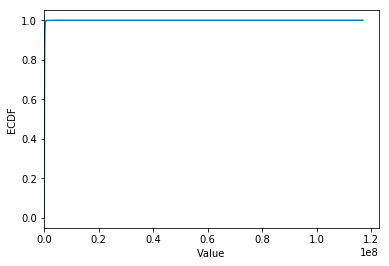

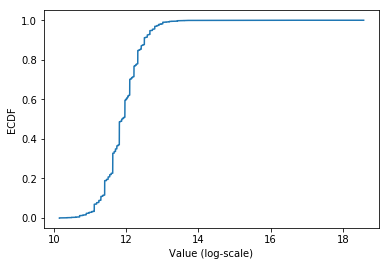

In [66]:
# 用公式計算ECDF的x、y值: https://www.codementor.io/kripanshubharga/calculate-ecdf-in-python-gycltzxi3
# np_data = np.array(app_train['AMT_INCOME_TOTAL'])
# cdf_x = np.sort(app_train['AMT_INCOME_TOTAL'].unique())
# x_values = np.linspace(min(cdf_x), max(cdf_x), len(cdf_x))
# np_data_size = np_data.size
# y_values = []
# for i in x_values:
#     temp = np_data[np_data <= i]
#     value = temp.size / np_data_size
#     y_values.append(value)
x_values, y_values = empirical_CDF(app_train['AMT_INCOME_TOTAL'])

# plt.plot(list(cdf.index), cdf/cdf.max())
plt.plot(x_values, y_values)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([x_values.min(), x_values.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(x_values)), y_values)
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

### 2. REGION_POPULATION_RELATIVE

In [67]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


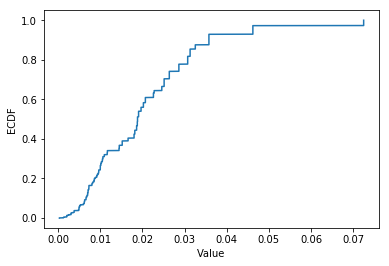

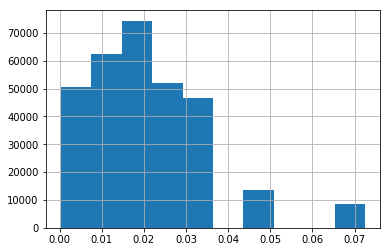

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [68]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
x_values, y_values = empirical_CDF(app_train['REGION_POPULATION_RELATIVE'])

plt.plot(x_values, y_values)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

### 3. OBS_60_CNT_SOCIAL_CIRCLE

In [70]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


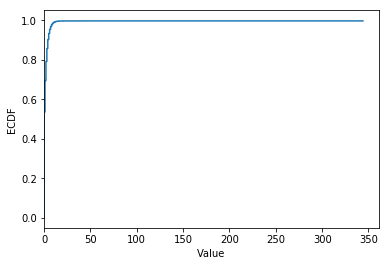

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


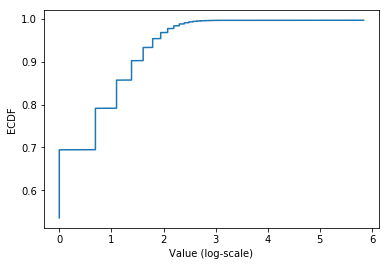

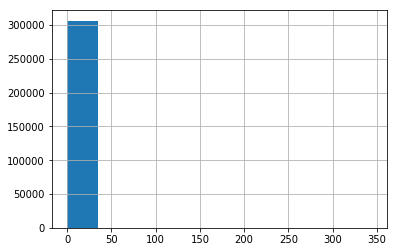

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [74]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
x_values, y_values = empirical_CDF(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])

plt.plot(x_values, y_values)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([min(x_values) * 0.95, max(x_values) * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(x_values)), y_values)
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
# plt.xlim([min(x_values) * 0.95, max(x_values) * 1.05])
# plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()

print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

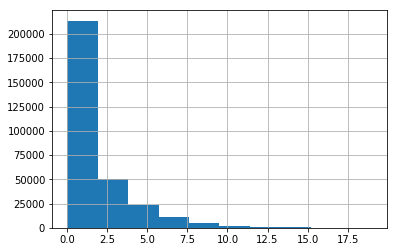

In [86]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製

app_train[app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20]['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()